### Linear regresi dengan basis fungsi (FinancialMarket Dataset)

Kode yang disediakan bertujuan untuk mempersiapkan analisis regresi menggunakan Python. Pertama, beberapa library penting diimpor, seperti pandas untuk manipulasi data, sklearn untuk model regresi dan evaluasi, serta matplotlib untuk visualisasi. Kemudian, kode ini memungkinkan pengguna untuk mengunggah file CSV yang berisi dataset ke dalam lingkungan Google Colab. Setelah file diunggah, dataset dimuat ke dalam sebuah DataFrame dengan menggunakan `pd.read_csv`. Terakhir, dengan menggunakan `df.head()`, lima baris pertama dari dataset ditampilkan untuk memberikan gambaran awal tentang struktur dan isi data, yang akan berguna untuk langkah-langkah analisis dan pemodelan selanjutnya. Dengan langkah-langkah ini, pengguna siap untuk melakukan pemrosesan data lebih lanjut, membagi dataset, dan melatih model regresi.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('FinancialMarket.csv')

print(df.head())

Saving FinancialMarket.csv to FinancialMarket.csv
         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


Kode yang diberikan bertujuan untuk membersihkan dataset dan memberikan informasi penting tentang struktur data. Pertama, baris yang mengandung nilai kosong *(NaN*) dihapus dari DataFrame dengan menggunakan metode *dropna()*, sehingga analisis dan model yang akan dibangun tidak terpengaruh oleh data yang hilang. Selanjutnya, tipe data setiap kolom ditampilkan menggunakan `df.dtypes`, yang membantu pengguna memahami jenis data yang ada, seperti angka atau string, dan menentukan langkah pemrosesan data yang diperlukan. Terakhir, daftar nama kolom dalam dataset ditampilkan melalui `df.columns`, memberikan gambaran umum tentang fitur-fitur yang tersedia. Dengan langkah-langkah ini, pengguna dapat melanjutkan analisis dengan pemahaman yang lebih baik tentang dataset yang sedang digunakan.

In [2]:
df = df.dropna()

print(df.dtypes)

print("Column names in the dataset:")
print(df.columns)

x                float64
combined_data    float64
dtype: object
Column names in the dataset:
Index(['x', 'combined_data'], dtype='object')


Kode yang diberikan berfungsi untuk mempersiapkan data untuk model regresi dengan menentukan variabel target dan membagi dataset menjadi set pelatihan dan pengujian. Pertama, variabel target_column ditetapkan sebagai 'combined_data', yang menunjukkan kolom dalam DataFrame df yang akan digunakan sebagai variabel target dalam analisis. Kemudian, X didefinisikan dengan menghapus kolom target dari DataFrame menggunakan `df.drop(target_column, axis=1)`, sehingga X berisi semua fitur yang akan digunakan untuk memprediksi nilai target. Variabel y diisi dengan kolom target itu sendiri, yaitu `df[target_column]`. Selanjutnya, data dibagi menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split, **di mana 80% data digunakan untuk pelatihan dan 20% untuk pengujian**, dengan parameter random_state=42 untuk memastikan bahwa pembagian data tersebut dapat direproduksi. Dengan langkah-langkah ini, data siap untuk melatih model regresi dan mengevaluasi kinerjanya.

In [3]:
target_column = 'combined_data'

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode ini bertujuan untuk melatih model regresi linier menggunakan data pelatihan yang telah disiapkan sebelumnya. Pertama, objek model dibuat dengan memanggil kelas `LinearRegression()` dari pustaka sklearn. Ini menginisialisasi model regresi linier yang akan digunakan untuk memprediksi nilai target berdasarkan fitur yang ada. Selanjutnya, metode` fit(X_train, y_train)` dipanggil pada objek model, di mana X_train berisi fitur-fitur dari data pelatihan dan y_train berisi nilai target yang sesuai. Proses ini memungkinkan model untuk belajar dari data pelatihan, mengidentifikasi hubungan antara fitur dan target, dan mengoptimalkan parameter internalnya untuk meminimalkan kesalahan prediksi. Setelah langkah ini, model siap untuk digunakan dalam membuat prediksi pada data baru atau data pengujian.

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Kode ini berfungsi untuk membuat prediksi nilai target menggunakan model regresi linier yang telah dilatih sebelumnya. Dengan memanggil metode `predict(X_test)` pada objek model, kode ini menghasilkan prediksi y_pred berdasarkan fitur-fitur yang terdapat dalam set pengujian, yaitu X_test. Proses ini menggunakan parameter yang telah dioptimalkan selama pelatihan untuk menghitung nilai target yang diharapkan untuk setiap sampel dalam data pengujian. Hasil dari prediksi ini, yang disimpan dalam variabel y_pred, akan digunakan untuk mengevaluasi kinerja model dengan membandingkannya terhadap nilai target sebenarnya dari data pengujian. Dengan demikian, langkah ini merupakan tahap penting dalam proses analisis regresi, karena memungkinkan pengguna untuk mengetahui seberapa baik model dapat memprediksi hasil berdasarkan data yang belum pernah dilihat sebelumnya.

In [5]:
y_pred = model.predict(X_test)

Kode ini digunakan untuk mengevaluasi kinerja model regresi linier dengan menghitung beberapa metrik penting. Pertama, `mean_squared_error(y_test, y_pred) `menghitung Mean Squared Error (MSE) antara nilai target sebenarnya (y_test) dan prediksi yang dihasilkan oleh model (y_pred). MSE memberikan ukuran seberapa besar kesalahan rata-rata kuadrat dari prediksi, dengan nilai yang lebih rendah menunjukkan model yang lebih baik. Selanjutnya,` np.sqrt(mse)` digunakan untuk menghitung Root Mean Squared Error (RMSE), yaitu akar kuadrat dari MSE, yang memberikan interpretasi yang lebih mudah terhadap kesalahan prediksi dalam satuan yang sama dengan variabel target. Akhirnya, r2_score(y_test, y_pred) menghitung koefisien determinasi (R²), yang menunjukkan seberapa baik model menjelaskan variasi dalam data; nilai R² berkisar antara 0 dan 1, di mana nilai yang lebih dekat ke 1 menunjukkan model yang lebih baik. Dengan tiga metrik ini, pengguna dapat menilai efektivitas model regresi yang telah dibangun.

In [6]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

Kode ini berfungsi untuk menampilkan hasil evaluasi dari model regresi linier yang telah dilatih. Dengan menggunakan fungsi `print()`, informasi mengenai kinerja model dicetak ke layar. Pertama, judul "Regresi Linear biasa" dicetak untuk menunjukkan jenis analisis yang sedang dilakukan. Selanjutnya, nilai Mean Squared Error (MSE) ditampilkan dengan format empat angka desimal menggunakan f-string, memberikan gambaran tentang seberapa besar kesalahan rata-rata kuadrat dari prediksi. Kemudian, Root Mean Squared Error (RMSE) juga ditampilkan dalam format yang sama, memberikan interpretasi yang lebih intuitif terhadap kesalahan dalam satuan yang sama dengan variabel target. Terakhir, koefisien determinasi (R²) dicetak untuk menunjukkan seberapa baik model menjelaskan variasi dalam data. Dengan menampilkan metrik-metrik ini, pengguna dapat dengan mudah mengevaluasi dan memahami kinerja model regresi linier yang telah dibangun.

In [7]:
print("\nRegresi Linear biasa")
print(f"Linear Model - Mean Squared Error (MSE): {mse:.4f}")
print(f"Linear Model - Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Linear Model - R-Squared (R²): {r_squared:.4f}")


Regresi Linear biasa
Linear Model - Mean Squared Error (MSE): 9.4014
Linear Model - Root Mean Squared Error (RMSE): 3.0662
Linear Model - R-Squared (R²): 0.6782


Kode ini melakukan analisis regresi polinomial dengan derajat yang ditentukan dan membandingkannya dengan regresi linier biasa. Pertama, derajat polinomial ditetapkan ke 2, dan objek PolynomialFeatures diinisialisasi dengan derajat tersebut. Metode `fit_transform(X)` kemudian digunakan untuk mengubah fitur-fitur dalam X menjadi fitur polinomial, yang menghasilkan matriks baru X_poly yang mencakup kombinasi polinomial dari fitur asli. Selanjutnya, dataset dibagi menjadi set pelatihan dan pengujian dengan menggunakan train_test_split, **dengan 80% data untuk pelatihan dan 20% untuk pengujian**. Model regresi linier diinisialisasi lagi dalam objek poly_model, dan dilatih menggunakan data polinomial pelatihan X_poly_train dan target y_train. Setelah model dilatih, prediksi dilakukan pada data pengujian menggunakan poly_model.predict`(X_poly_test)`, menghasilkan nilai prediksi y_poly_pred. Kode ini kemudian menghitung MSE, RMSE, dan R² untuk model polinomial dengan cara yang sama seperti sebelumnya. Hasil evaluasi dicetak ke layar, menunjukkan kinerja model polinomial dengan derajat yang ditentukan. Dengan langkah-langkah ini, pengguna dapat membandingkan efektivitas model regresi polinomial terhadap model regresi linier biasa.

In [8]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred = poly_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r_squared_poly = r2_score(y_test, y_poly_pred)

print("\nRegresi Linear dengan basis fungsi")
print(f"Polynomial Model (Degree {degree}) - Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Polynomial Model (Degree {degree}) - Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"Polynomial Model (Degree {degree}) - R-Squared (R²): {r_squared_poly:.4f}")


Regresi Linear dengan basis fungsi
Polynomial Model (Degree 2) - Mean Squared Error (MSE): 1.3481
Polynomial Model (Degree 2) - Root Mean Squared Error (RMSE): 1.1611
Polynomial Model (Degree 2) - R-Squared (R²): 0.9539


Kode ini digunakan untuk memvisualisasikan perbandingan antara prediksi dari model regresi linier biasa dan model regresi polinomial. Pertama, indeks dari nilai target y_test diurutkan menggunakan `np.argsort(y_test)`, dan hasilnya digunakan untuk menyortir nilai-nilai y_test, y_pred, dan y_poly_pred agar sesuai dengan urutan yang sama. Selanjutnya, sebuah figure baru dengan ukuran 8x6 inci dibuat menggunakan `plt.figure()`. Kemudian, dua plot ditambahkan: yang pertama menunjukkan prediksi dari regresi linier biasa dengan garis merah, dan yang kedua menunjukkan prediksi dari regresi polinomial dengan garis hijau. Judul, label sumbu, dan grid ditambahkan untuk memperjelas informasi yang ditampilkan. Legenda juga ditambahkan untuk membedakan antara kedua model. Akhirnya, `plt.show()` digunakan untuk menampilkan visualisasi tersebut. Dengan cara ini, pengguna dapat dengan mudah membandingkan hasil prediksi dari kedua model dan melihat bagaimana model polinomial mungkin lebih baik dalam menangkap pola dalam data.

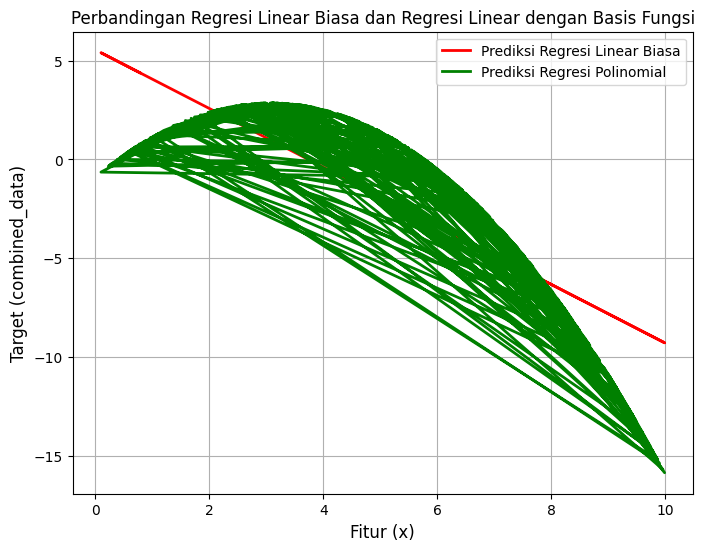

In [9]:
sorted_idx = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
y_poly_pred_sorted = y_poly_pred[sorted_idx]

plt.figure(figsize=(8, 6))

plt.plot(X_test, y_pred, label="Prediksi Regresi Linear Biasa", linestyle='-', color='red', linewidth=2)
plt.plot(X_test, y_poly_pred, label="Prediksi Regresi Polinomial", linestyle='-', color='green', linewidth=2)

plt.title("Perbandingan Regresi Linear Biasa dan Regresi Linear dengan Basis Fungsi", fontsize=12)
plt.xlabel("Fitur (x)", fontsize=12)
plt.ylabel("Target (combined_data)", fontsize=12)

plt.grid(True)

plt.legend(loc='best')

plt.show()